# PSF - Confocal Laser Scanning Microscope  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgn
from numpy.random import poisson
import os
import imageio
import math
from sklearn.metrics import mean_squared_error


import brighteyes_ism.analysis.APR_lib as apr
import brighteyes_ism.analysis.Deconv_lib as deconv
import brighteyes_ism.analysis.FRC_lib as frc
import brighteyes_ism.analysis.FocusISM_lib as fism

import brighteyes_ism.simulation.PSF_sim as ism
import brighteyes_ism.simulation.Tubulin_sim as simTub

## Point-spread functions

## STEP 1: Optical Parameters imported from RayOptics, Zeemax, OSLO

In [2]:
N = 1 # number of detector elements in each dimension

center = math.ceil(N*N/2) # Middle element
Nx = 513 # number of pixels of the simulation space. (Ground Truth)
pxsizex = 25 # pixel size of the simulation space (nm) 
pxdim = 50e3 # detector element size in real space (nm)
pxpitch = 75e3 # detector element pitch in real space (nm)
## Difference betweeb detector element size and pitch?
M = 500 # total magnification of the optical system (e.g. 100x objective follewd by 5x telescope)

#%% PSF simulation 2D

exPar = ism.simSettings()
exPar.wl = 640 # excitation wavelength (nm)
exPar.mask_sampl = 31

emPar = exPar.copy()
emPar.wl = 660 # emission wavelength (nm)

z_shift = 0 #nm

## STEP 2: Generate excitation PSF and detection PSFs based Optical Parameters and Imaging Physics

In [3]:
PSF5by5, detPSF, exPSF = ism.SPAD_PSF_2D(N, Nx, pxpitch, pxdim, pxsizex, M, exPar, emPar, z_shift=z_shift)

PSF5by5 /= np.max(PSF5by5)

# Why two times calculating field near the focus

Calculating field near the focus:


XY plane: 100%|██████████████████████████████████████████████████████████████████████| 513/513 [02:30<00:00,  3.42it/s]


Calculating field near the focus:


XY plane: 100%|██████████████████████████████████████████████████████████████████████| 513/513 [02:22<00:00,  3.61it/s]


### Plot PSF

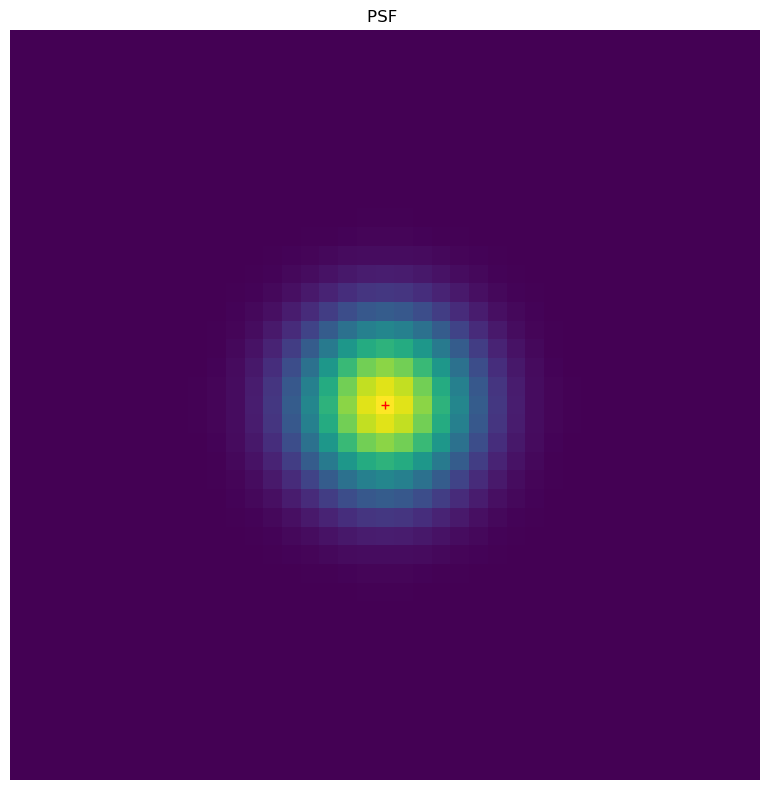

In [5]:
fig = plt.figure(figsize=(8,8))
for i in range(N*N):
    ax = fig.add_subplot(N, N, i+1)
    ax.imshow(PSF5by5[:,:,i], extent = [-(Nx//2*pxsizex), Nx//2*pxsizex, -(Nx//2*pxsizex), Nx//2*pxsizex])
    ax.set_xlim(-500, 500)
    ax.set_ylim(-500, 500)
    ax.plot(0,0,'+r')
    ax.set_title("PSF ")
    plt.axis('off')

plt.tight_layout()

## STEP 3: Define The Medical Phantom (E.g., Vocal Fold with Cancerous Cell)

  4%|███▎                                                                               | 1/25 [00:03<01:23,  3.47s/it]

tubulin filament out of the boundaries [118.09551408] [-0.39585011] 513


  8%|██████▋                                                                            | 2/25 [00:06<01:20,  3.50s/it]

tubulin filament out of the boundaries [149.20718653] [-0.23051104] 513


 12%|█████████▉                                                                         | 3/25 [00:19<02:42,  7.40s/it]

tubulin filament out of the boundaries [513.24016567] [372.74843181] 513


 16%|█████████████▎                                                                     | 4/25 [00:33<03:34, 10.24s/it]

tubulin filament out of the boundaries [513.42401389] [282.19643533] 513


 20%|████████████████▌                                                                  | 5/25 [00:37<02:41,  8.10s/it]

tubulin filament out of the boundaries [170.56855384] [513.75500028] 513


 24%|███████████████████▉                                                               | 6/25 [00:44<02:23,  7.55s/it]

tubulin filament out of the boundaries [235.53262337] [-0.26964244] 513


 28%|███████████████████████▏                                                           | 7/25 [00:57<02:45,  9.20s/it]

tubulin filament out of the boundaries [513.21381528] [389.38759107] 513


 32%|██████████████████████████▌                                                        | 8/25 [01:10<03:02, 10.71s/it]

tubulin filament out of the boundaries [513.73272566] [362.23539305] 513


 36%|█████████████████████████████▉                                                     | 9/25 [01:19<02:39,  9.96s/it]

tubulin filament out of the boundaries [282.9857453] [-0.3256765] 513


 40%|████████████████████████████████▊                                                 | 10/25 [01:21<01:53,  7.54s/it]

tubulin filament out of the boundaries [105.78028712] [513.39519478] 513


 44%|████████████████████████████████████                                              | 11/25 [01:26<01:33,  6.67s/it]

tubulin filament out of the boundaries [-0.37847395] [67.78958745] 513


 48%|███████████████████████████████████████▎                                          | 12/25 [01:36<01:40,  7.74s/it]

tubulin filament out of the boundaries [513.07389846] [445.93011994] 513


 52%|██████████████████████████████████████████▋                                       | 13/25 [01:42<01:28,  7.38s/it]

tubulin filament out of the boundaries [-0.06639223] [34.67220592] 513


 56%|█████████████████████████████████████████████▉                                    | 14/25 [01:52<01:27,  7.98s/it]

tubulin filament out of the boundaries [413.6993373] [-0.48725528] 513


 60%|█████████████████████████████████████████████████▏                                | 15/25 [01:56<01:08,  6.80s/it]

tubulin filament out of the boundaries [144.21680712] [513.29728392] 513


 64%|████████████████████████████████████████████████████▍                             | 16/25 [02:06<01:11,  7.97s/it]

tubulin filament out of the boundaries [211.25288097] [513.01883062] 513


 68%|███████████████████████████████████████████████████████▊                          | 17/25 [02:13<00:59,  7.40s/it]

tubulin filament out of the boundaries [304.19263799] [-0.25401749] 513


 72%|███████████████████████████████████████████████████████████                       | 18/25 [02:16<00:44,  6.33s/it]

tubulin filament out of the boundaries [197.38627931] [513.3539311] 513


 76%|██████████████████████████████████████████████████████████████▎                   | 19/25 [02:28<00:47,  7.85s/it]

tubulin filament out of the boundaries [286.78696257] [513.51877317] 513


 80%|█████████████████████████████████████████████████████████████████▌                | 20/25 [02:40<00:45,  9.05s/it]

tubulin filament out of the boundaries [513.33020108] [408.13678738] 513


 84%|████████████████████████████████████████████████████████████████████▉             | 21/25 [02:43<00:29,  7.36s/it]

tubulin filament out of the boundaries [-0.3836896] [321.18478685] 513


 88%|████████████████████████████████████████████████████████████████████████▏         | 22/25 [02:53<00:24,  8.19s/it]

tubulin filament out of the boundaries [513.79525288] [202.71077099] 513


 92%|███████████████████████████████████████████████████████████████████████████▍      | 23/25 [03:05<00:18,  9.15s/it]

tubulin filament out of the boundaries [340.93415184] [513.32444314] 513


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 24/25 [03:11<00:08,  8.42s/it]

tubulin filament out of the boundaries [311.63260597] [513.2288801] 513


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [03:18<00:00,  7.93s/it]
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


tubulin filament out of the boundaries [334.25377791] [-0.03397478] 513


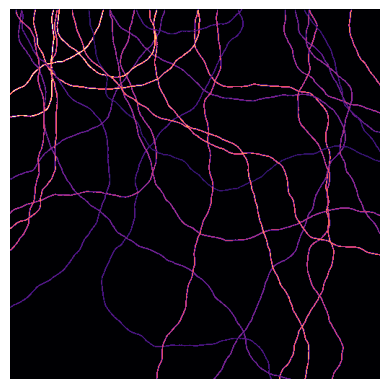

In [6]:
#%% Generate tubulin

tubulin = simTub.tubSettings()
tubulin.xy_pixel_size = pxsizex
tubulin.xy_dimension = Nx
tubulin.xz_dimension = 1     
tubulin.z_pixel = 1     
tubulin.n_filament = 25
tubulin.radius_filament = pxsizex*0.9
tubulin.intensity_filament = [0.2,0.9]  
phTub = simTub.functionPhTub(tubulin)
plt.figure()
plt.imshow(phTub[:,:,0],cmap='magma')
plt.axis('off')

TubDec = phTub[:,:,0]

# Specify the file path and name
file_path = 'data/temp/'
file_name = 'GroundTruth.png'

# Save the image as a PNG file
imageio.imwrite(file_path + file_name, phTub[:,:,0])


## STEP 4: Acquire the Data (Convolution)

In [50]:
#%% Convolve tubulin with psf
N = 5 # number of detector elements in each dimension
img5by5 = np.empty(PSF5by5.shape)


img5by5[:, :, 0] = sgn.convolve(TubDec, PSF5by5[:, :, 0] ,mode = 'same')

#%% Convert to photons and add Poisson noise
img5by5 *= 1e2
img5by5 = np.uint16(img5by5)
img5by5 = poisson(img5by5)

### Plot the Detector Images 

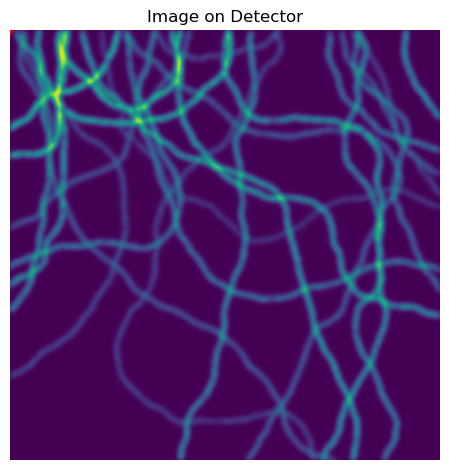

In [71]:

fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(img5by5[:,:,0])
ax.plot(0,0,'+r')
ax.set_title("Image on Detector")
plt.axis('off')

plt.tight_layout()

## STEP 5: Apply Computational Algorithms  (Optional)

**Based on the above steps, reiterate your optics, imaging system, or computational algorithm till your desired objectives for your application.**
